# Regression Problems

**Regression problems** are problems where we try to predict a numerical output value given some input datapoint based on some examples of input datapoints that have known outputs.

## Examples

1. If we have a dataset of workers in a certain position of numbers of years of experience as an input and salary, we might want to predict salaries we don't know based on the years of experience a person has.

1. If we have a dataset of variables about houses (floorspace, number of bedrooms, number of bathrooms, number of stories, age of the house) along with their selling prices, we might want to predict selling prices of homes not in the dataset based on the other variables about the house.

1. If we have a dataset of variables about countries (average salary, average education of citizens, death rate, birth rate, infant mortality rate, etc.) along with their GDP, we might want to predict the GDP of countires not in the dataset based on the other variables about the country.

1. If we have a dataset of seasonal variables about NBA basketball teams (points per game, turnovers per game, point differential, rebounds per game, blocks per game, etc.) and the numbers of wins they had in different seasons, we might want to take the statistics of a team early in a season to try to predict the number of wins they will have.

## Types of Regression Problems

There are different types of regression problems based on the numbers of input variables and output variables.

* A **simple** regression problem predicts an output variable with just one input variable like Example 1.

* A **multiple** regression problem predicts an output variable with more than one input variable like Examples 2 and 3.

* A **multivariate** regression problem predicts more than one output variables

We will not discuss multivariate regression this week, but we will show how neural networks can be used for these problems in the future.

## The Math of a Regression Problem

All of these regression problems have some things in common: there are example datapoints with outputs and we want to predict the outputs for new datapoints. Consider a $d$-dimensional point, or vector, $x_1\in\mathbb{R}^d$ and denote $x_1=(x_{11},x_{12},...,x_{1d})$. $x_1$ maps to an output $y_1\in\mathbb{R}$. We call the point $x_1$ an **example** and we call $y_1$ the **output** of $x_1$. (In statistics, the components of the vector $x_1$ are more frequently called **predictors** or **independent variables** and the $y_i$ values are more frequently called the **response** or **dependent variable**.)

In a perfect world, a solution to a (univariate) regression problem will find a function $f:\mathbb{R}^d\to\mathbb{R}$ that can do two things:

1. Mapping each example $x_i$ in a dataset to its output $y_i=f(x_i)$
1. Generalize to successfully predict outputs of new datapoints

In reality, $f$ will not always map each input $x_i$ values to each $y_i$ value perfectly or generalize to new inputs perfectly, but we try to get as close to this ideal as possible.

## Regression Algorithms

There are a number of popular approaches to regression problems, including the following.

* least squares regression
* lasso regression
* ridge regression
* support vector machines
* neural networks

This week, we will consider the first three approaches as they are quite similar. As an added bonus, they all use a numerical optimization scheme called stochastic gradient descent, which is one of the main algorithms needed to make neural networks work.

## Linear Regression

We will assume the function $f$ we aim to predict is linear in some parameters $\beta_0,...,\beta_d$ so that our predicted function will be

$$
f(x_i)=\beta_0 + \sum\limits_{k=1}^d \beta_k x_{ik}=\beta_0+\beta_1 x_{i1}+\cdots+\beta_d x_{id}
$$

and we will try to choose $\beta_0,...,\beta_d$ that will minimize a loss function on a training dataset $(x_1,y_1),...,(x_n,y_n)$. This loss function will be small if each $f(x_i)$ is near each $y_i$, which is what we want

### Note

It is a common misconception that "linear regression" must fit linear functions to data, but the "linear" part of linear regression refers to the fact that $f$ is linear with respect to $\beta_0,...,\beta_d$, not with respect to $x_i$, so it is certainly possible to apply some preprocessing to the datapoints.

For example, if each $x_i\in\mathbb{R}^1$, we can fit a parabola by manipulating each $x_i$ into $x_i^*=(x_i,x_i^2)$ so that our predicted function would be

$$f(x_i)=\beta_0+\beta_1 x_i+\beta_2 x_i^2.$$

While we will discuss only $x=(x_1,...,x_d)$, keep in mind that we can always create new variables from the data, preprocess the data into different forms, and so on. This topics go beyond the scope of this course, but I want you to realize linear regression can learn to represent functions far beyond simply lines and planes.

## Linear Regression by Ordinary Least Squares

Recall that we have a labeled dataset $(x_1,y_1)$, ..., $(x_n,y_n)$ with each $x_i\in\mathbb{R}^d$ and each $y_i\in\mathbb{R}$ and our goal is to find a function $f$ that maps the $x_i$'s to the $y_i$'s as well as possible, and, we hope, effective at mapping unknown datapoints to appropriate outputs.

In the **ordinary least squares** method, we try to minimize a the **sum of squared differences** between the real outputs $y_1, ..., y_n$ and the predicted outputs $f(x_1)$, ..., $f(x_n)$. In other words, the loss function in this method is

$$L(\beta)=\sum\limits_{i=1}^n \left(f(x_i)-y_i\right)^2 = \sum\limits_{i=1}^n \left(x_i^T\beta-y_i\right)^2,$$

which we will call a **loss function**, where

$$
X=\begin{pmatrix}
1 & x_{11} & x_{12} & \cdots & x_{1d}\\
1 & x_{21} & x_{22} & \cdots & x_{2d}\\
\vdots & \vdots & \vdots & \ddots & \vdots\\
1 & x_{n1} & x_{n2} & \cdots & x_{nd}
\end{pmatrix}
\hspace{2cm}y=\begin{pmatrix}
y_1 \\ y_2 \\ \vdots \\ y_n
\end{pmatrix}
\hspace{2cm}\beta=\begin{pmatrix}
\beta_0 \\ \beta_1 \\ \vdots \\ \beta_d
\end{pmatrix}
$$

This matrix is the same as what we used with classification problems except we added a column of ones to the left. Each row is a datapoint $x_i\in\mathbb{R}^d$ representing one example and each column represents one variable (also known as a predictor or a feature). Note that we will only add the column of ones within the class so that we can continue with the norms we established for $X$ last week. Given this, we can rewrite the loss function as

$$L(\beta)=\|X\beta-y\|^2_2=(X\beta-y)^T(X\beta-y),$$

where the $T$ subscript represents the **transpose** of a matrix. Here, $X$ and $y$ are constants derived from the dataset, so the $\beta$ values are the only unknowns, so we need to find the $\beta$ values that minimize the loss function $L$. In other words, we need to solve a minimization problem

$$\min\limits_\beta\,L(\beta)$$

or, more specifically,

$$\min\limits_\beta\,(X\beta - y)^T(X\beta - y).$$

We should note that these $\beta$ values are called **parameters** of the model. They are NOT hyperparameters. The difference is:

1. Parameters are values that are estimated by the model automatically from the data.
1. Hyperparameters are values that we set before the model learns from the data.

There are no hyperparameters in our loss function. So, in contrast to the $k$-nearest neighbors classifier, which had a hyperparameter but no parameters, ordinary least squares has some parameters but no hyperparameters. However, choosing a way to normalize the data (or not) could be considered a hyperparameter.

In multivariate calculus, the approach to minimize a differentiable function is to take derivatives with respect to $\beta_0, ..., \beta_d$, set them all equal to zero, and solve. This may seem difficult, but we can actually do it for ordinary least squares. Before we take derivatives, let's convert the los function into a (longer but) simpler form. Transposes can be applied to sums of matrices separately, so

$$L(\beta)=((X\beta)^T-y^T)(X\beta-y).$$

Using the distributive property of matrix multiplication,

$$L(\beta)=(X\beta)^T X\beta-(X\beta)^T y-y^T X\beta+y^T y$$

If we realize $y$ and $X\beta$ are both matrices of shape $n\times 1$, then we should have $(X\beta)^T y=y^T X\beta$, so the loss function is

$$L(\beta)=(X\beta)^T X\beta-2(X\beta)^T y+y^T y$$

Since $(AB)^T=B^TA^T$ for matrices, we can simplify the terms as

$$L(\beta)=\beta^T X^T X\beta-2\beta^T X^T y+y^T y$$

Now, of course, this is a scalar (because, in the end, the loss is just a number--the sum of squared errors), so we can take the derivatives with respect to $\beta_1$, ..., $\beta_d$ and put those into a vector as

$$\nabla L(\beta)=2X^T X\beta-2X^T y$$

As in multivariate calculus, we set this whole vector equal to 0 and solve for the estimated version of $\beta$ as

$$
\begin{align*}
2X^T X\beta-2X^T y &= 0\\
X^T X\beta &= X^T y.
\end{align*}
$$

Then, if $X^T X$ is an invertible matrix, then we can multiply both sides of the equation by its inverse to solve for $\beta$

$$
\begin{align*}
(X^T X)^{-1}(X^T X\beta) &= (X^T X)^{-1}X^T y\\
\beta &=(X^T X)^{-1}X^T y.
\end{align*}
$$

At long last, we have a formula for the exact solution for the $\beta$ values that minimize the loss function.

#### Linear Algebra Notes

* The formula above holds only if the inverse of the matrix $X^T X$ exists. Assuming $n\geq d$, the inverse exists when the columns of $X$ are linearly independent. (See <a href="https://www.khanacademy.org/math/linear-algebra/matrix-transformations/matrix-transpose/v/lin-alg-showing-that-a-transpose-x-a-is-invertible">this video</a> or pretty much any linear algebra book.)

* If you have studied linear algebra, you might recognize $(X^T X)^{-1}X^T$ is the <a href="https://mathworld.wolfram.com/Moore-PenroseMatrixInverse.html">Moore-Penrose pseudoinverse</a> of $X$.

Anyway, the formula for $\beta$ does not look so nice to do by hand since it requires a matrix multiplication, a matrix inverse, and two more matrix multiplications, but a computer can complete these tasks quickly. (The <a href="https://mathworld.wolfram.com/Moore-PenroseMatrixInverse.html">best algorithms</a> for matrix multiplication and matrix inverses for $n\times n$ matrices each have computational complexity less than $O(n^3)$, so doing a few of these is no problem, even for quite large matrices.)

## Performance Metrics for Linear Regression

Before we use this class to apply the ordinary least squares method on some examples, let's consider a few performance metrics in common usage for regression.

With linear regression, we generally have the unfortunate situation that the model we construct is not perfect even on the training set. Therefore, we first need to consider the performance on the training data to which it was fit just to see how well the model fits to the training data. The formulas for the common metrics are not particularly interesting, so we just state what they represent and what value they should ideally have:

* **Coefficient of determination** $R^2$ - the fraction of the variation in the data explained by the model. It is, in a sense, a measure of the strength of the linear relationship between the variables. Ideally, it will be near 1.

* **Mean squared error (MSE)** - the mean of the squared errors between the points and the fitted function, i.e. the loss function of the ordinary least squares loss function divided by the number of examples in the training data, $n$. Ideally, it will be as small as possible.

* **Mean absolute error (MAE)** - the mean of the absolute errors between the points and the fitted function. Ideally, it will be as small as possible.

If these values are far from their ideal values for the training set, the model does not even fit the training data well, so it probably will not fit the testing data well. The ordinary least squares solution finds the optimal parameters for a linear fit, so poor performance on the training set means the data do not have a strong linear relationship.

Some preprocessing of the data might make it work better. For example, you can apply a logarithm to a variable if there's a linear relationship with that variable on a log scale. It's beyond the scope of our class, but see, for example, the (free) classic book <a href="https://web.stanford.edu/~hastie/ElemStatLearn/">*Elements of Statistical Learning*</a> by Hastie, et. al., section 2.6.3 for an introduction on linear basis expansions.

Second, we need to consider the performance on the testing data. We generally should consider the MSE or MAE.

## Ordinary Least Squares Code

Before we write some code for ordinary least squares, let's import some packages.

In [1]:
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import normalize
from sklearn.preprocessing import scale
import matplotlib.pyplot as plt
import pandas

# increase the width of boxes in the notebook file (this is only cosmetic)
np.set_printoptions(linewidth=180)

Let's create a class for using ordinary least squares in this way to fit the model and to predict outputs for unknown inputs. We will use the scikit-learn pattern.

In [2]:
class OrdinaryLeastSquaresExact:
        
    # fit the model to the data
    def fit(self, X, y):
        # save the training data
        self.data = np.hstack((np.ones([X.shape[0],1]), X))
        
        # save the training labels
        self.outputs = y
        
        # find the beta values that minimize the sum of squared errors
        X = self.data
        self.beta = np.linalg.inv(X.T @ X) @ X.T @ y
                
    # predict the output from testing data
    def predict(self, X):
        # initialize an empty matrix to store the predicted outputs
        yPredicted = np.empty([X.shape[0],1])
        
        # append a column of ones at the beginning of X
        X = np.hstack((np.ones([X.shape[0],1]), X))
        
        # apply the function f with the values of beta from the fit function to each testing datapoint (rows of X)
        for row in range(X.shape[0]):
            yPredicted[row] = self.beta @ X[row,]
            
        return yPredicted

## 1D Example

Let's make up some 1D data and test the method.

The predicted y values are [1.2 1.9 2.6 3.3 4. ]
The real y values are [1 2 3 3 4]
The beta values are [-3.   0.7]
The r^2 score is 0.9423076923076923
The mean squared error is 0.060000000000000074
The mean absolute error is 0.20000000000000212


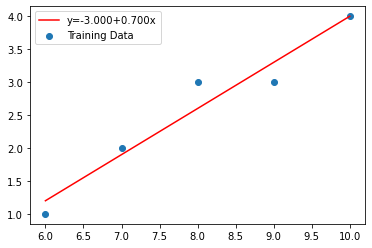

In [3]:
X = np.array([[6], [7], [8], [9], [10]])
y = np.array([1, 2, 3, 3, 4])

model = OrdinaryLeastSquaresExact()
model.fit(X,y)
predictions = model.predict(X)

# print the predictions
print('The predicted y values are', predictions.T[0])

# print the real y values
print('The real y values are', y)

# print the beta values
parameters = model.beta
print('The beta values are', parameters)

# plot the training points
plt.scatter(X, y, label = 'Training Data')

# plot the fitted model with the training data
xModel = np.linspace(6,10,100)
yModel = parameters[0] + parameters[1]*xModel
lineFormula = 'y={:.3f}+{:.3f}x'.format(parameters[0], parameters[1])
plt.plot(xModel, yModel, 'r', label = lineFormula)

# add a legend
plt.legend()

# return quality metrics
print('The r^2 score is', r2_score(y, predictions))
print('The mean squared error is', mean_squared_error(y, predictions))
print('The mean absolute error is', mean_absolute_error(y, predictions))

## 2D Example

Let's make up some 2D data and test to see if our method works well.

In [4]:
trainX = np.array([[2, 2], [2, 3], [5, 6], [6, 7], [9, 10]])
trainY = np.array([3, 13, 19, 29, 35])

testX = np.array([[2, 1], [4, 5], [6, 5], [8, 9]])
testY = np.array([9, 15, 25, 31])

# instantiate an OLS model
model = OrdinaryLeastSquaresExact()

# fit the model to the training data (find the beta parameters)
model.fit(trainX, trainY)

# return the predicted outputs for the datapoints in the training set
trainPredictions = model.predict(trainX)

# print the coefficient of determination r^2
print('The r^2 score is', r2_score(trainY, trainPredictions))

# print quality metrics
print('The mean squared error on the training set is', mean_squared_error(trainY, trainPredictions))
print('The mean absolute error on the training set is', mean_absolute_error(trainY, trainPredictions))

# return the predicted outputs for the datapoints in the test set
predictions = model.predict(testX)

# print the predictions
print('The predicted y values for the test set are', predictions.T[0])

# print the real y values
print('The real y values for the test set are', testY)

# print the beta values
print('The beta values are', model.beta)

# print quality metrics
print('The mean squared error on the test set is', mean_squared_error(testY, predictions))
print('The mean absolute error on the test set is', mean_absolute_error(testY, predictions))

The r^2 score is 0.9642679900744415
The mean squared error on the training set is 4.608000000000017
The mean absolute error on the training set is 1.5360000000000298
The predicted y values for the test set are [-6.52 19.08  6.6  32.2 ]
The real y values for the test set are [ 9 15 25 31]
The beta values are [-3.56 -6.24  9.52]
The mean squared error on the test set is 149.3792000000069
The mean absolute error on the test set is 9.799999999999962


For a low dimensional problem like this one, we can plot the points along with the function $f$.

Text(0.5, 0, 'y')

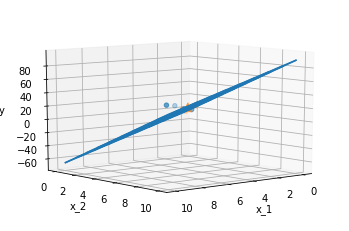

In [5]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

n = 100

# scatter plot of the test data
x1 = testX[:,0]
x2 = testX[:,1]
y = testY
ax.scatter(x1, x2, y, marker = 'o')

# scatter plot of the training data
x1 = trainX[:,0]
x2 = trainX[:,1]
y = trainY
ax.scatter(x1, x2, y, marker = '^')

# plot the plane we fit to the data
beta = model.beta

# surface plot
x1 = np.linspace(0,10,10)
x2 = np.linspace(0,10,10)

X1, X2 = np.meshgrid(x1,x2)
#Y = beta[0]*X1 + beta[1]*X2
Y = beta[0] + beta[1]*X1 + beta[2]*X2

surf = ax.plot_wireframe(X1, X2, Y)
ax.view_init(10, 50)

# add axis labels
ax.set_xlabel('x_1')
ax.set_ylabel('x_2')
ax.set_zlabel('y')

### Example: High School Graduation Rates in US States

Let's try to use ordinary least squares on a real dataset. The CSV file in '/data/US_State_data.csv' contains data from each U.S. state.

We would like to predict the output variable included, the high school graduation rate, from some input variables: including the crime rate (per 100,000 persons), the violent crime rate (per 100,000 persons), average teacher salary, student-to-teacher ratio, education expenditure per student, population density, and median household income.

This means we have 50 examples (one for each state), 7 input (predictor) variables, and one output (response) variable. In order to use the formula we derived above to attack the problem with ordinary least squares, we need to find the matrices $X$ and $y$.

In [6]:
# import the data from the csv file to an numpy array
data = pandas.read_csv('data/US_State_Data.csv', sep=',').to_numpy()
#print(data)
X = np.array(data[:,1:7], dtype=float)
y = np.array(data[:,8], dtype=float)

# split the data into training and test sets
(trainX, testX, trainY, testY) = train_test_split(X, y, test_size = 0.25, random_state = 1)

#trainX = normalize(trainX)
#testX = normalize(testX)

#trainX = scale(trainX)
#testX = scale(testX)

# run the model (same code as above)

# instantiate an OLS model
model = OrdinaryLeastSquaresExact()

# fit the model to the training data (find the beta parameters)
model.fit(trainX, trainY)

# return the predicted outputs for the datapoints in the training set
trainPredictions = model.predict(trainX)

# print the coefficient of determination r^2
print('The r^2 score is', r2_score(trainY, trainPredictions))

# print quality metrics
print('The mean squared error on the training set is', mean_squared_error(trainY, trainPredictions))
print('The mean absolute error on the training set is', mean_absolute_error(trainY, trainPredictions))

# return the predicted outputs for the datapoints in the test set
predictions = model.predict(testX)

# print the predictions
print('The predicted y values for the test set are', np.round(predictions.T[0],0))

# print the real y values
print('The real y values for the test set are     ', testY)

# print the beta values
print('The beta values are', model.beta)

# print quality metrics
print('The mean squared error on the test set is', mean_squared_error(testY, predictions))
print('The mean absolute error on the test set is', mean_absolute_error(testY, predictions))

The r^2 score is 0.3921626378110833
The mean squared error on the training set is 19.59820392039356
The mean absolute error on the training set is 3.796456104985703
The predicted y values for the test set are [80. 80. 89. 89. 80. 81. 85. 93. 75. 84. 84. 79. 83.]
The real y values for the test set are      [70. 83. 83. 81. 76. 87. 89. 89. 78. 78. 84. 80. 79.]
The beta values are [ 1.16286460e+02 -6.09008374e-03  3.98286852e-03 -1.63697058e-04 -2.97328939e-01 -4.74750536e-04  1.09164594e-02]
The mean squared error on the test set is 28.314919261809344
The mean absolute error on the test set is 4.64393583870603


## Ordinary Least Squares by Gradient Descent

While this approach to ordinary least squares does provide the global minimum of the loss function, there is another approach that uses numerical optimization called **gradient descent**, which is a very quick method exploiting some pretty simple ideas from multivariable calculus. SGD can approximately solve a minimization problem for a differentiable function, such as the ordinary least squares . While it will only find an approximate answer at best, it is practically good enough in most cases. The benefits are that it is computationally cheap and can be used for many other useful loss functions.

Gradient descent (and it's sped-up version, **stochastic gradient descent**) is *heavily* used in machine learning. Along with backpropagation, SGD is the primary method used for training neural networks. In fact, the first practical neural networks were written about in the machine learning literature under a class of methods called "gradient-based learning" due to the primacy of SGD and related methods.

### Some Ideas from Multivariate Calculus

First, we need just a few ideas from multivariate calculus. This is quite minimal, but you learn more details about these topics in sections 4.3 (partial derivatives), 4.6 (gradients), and 4.7 (multivariate optimization) of <a href="https://openstax.org/details/books/calculus-volume-3">*Calculus Volume 3*</a> by Strang.

The ideas we need for gradient descent include:

* If we have a differentiable function of several variables, like our loss function $L(\beta) = L(\beta_0, ..., \beta_d)$, we can define the **partial derivatives** with respect to each of these variables as

    $$L_{\beta_i}=\frac{\partial L}{\partial \beta_i}=\lim\limits_{h\to 0}\frac{L(\beta+he_i) - L(\beta)}{h},$$

    where $e_i$ is a $(d+1)$-vector with all 0s except for a 1 in the $i$th component.  Geometrically, this partial derivative is the slope of $L$ if we go in the direction of $e_i$.
    
* To **minimize a multivariable function** by hand, we need to find critical points, which are points $\beta$ where *all* partial derivatives are 0 and compare which ones give the lowest outputs. In numerical algorithms, must settle for approximations that are "nearly" critical points.
    
* If we put these partial derivatives into a vector of $d+1$ variables, we call that a **gradient**, which we denote
    
    $$
    \nabla L(\beta)
    =\begin{pmatrix}
    L_{\beta_0}(\beta) \\
    \vdots \\
    L_{\beta_d}(\beta)
    \end{pmatrix}
    $$
    
* The **directional derivative** of a function in the direction of a unit vector $u$ starting from a point $\beta$.

    $$D_u L(\beta) = \lim\limits_{h\to 0}\frac{L(\beta+hu) - L(\beta)}{h},$$
    
    which is the slope in the direction of the vector $u$. Since $L$ is differentiable, this directional derivative will be defined for all directions leaving from $\beta$. In 1D, there are just two directions: left of right. In 2D, we have directional derivatives at every angle in a circle around the point.
    
* A common theorem says the **directional derivative is maximized in the direction of the gradient** at each point, so the gradient gives the direction of the *steepest ascent* in the function $L$. Similarly, the direction of the *steepest descent* is $-\nabla L(\beta)$, the opposite direction.

### The Geometry of Gradient Descent

We will discuss the geometry of gradient-based methods in class, but let's discuss a general outline of how gradient descent works, setting aside the stochastic version for now. The goal of gradient descent is to approximately solve the minimization problem

$$\min\limits_{\beta}\,L(\beta)$$

by finding (approximate) critical values by making a guess for the location of a critical value, taking a small step in the opposite direction as the gradient, and repeating this over and over until, hopefully, we reach a minimum value.

The steps are:

0. Make a guess for the critical value -- $\beta^0$
1. Compute the gradient of $L$ at $\beta^0$
2. Take a small step to $\beta^1 = \beta^0 - \alpha\nabla L\left(\beta^0\right)$
3. Compute the gradient of $L$ at $\beta^1$
4. Take a small step to $\beta^2 = \beta^1 - \alpha\nabla L\left(\beta^1\right)$
5. (repeat until the gradient gets close to $(0, ..., 0)$)

This $\alpha>0$ is a number that will be used in the algorithm as a multiplier of the steps the method will take. This is called the **learning rate**.

This idea seems plausible from the calculus ideas above because we just keep switching directions and making a step in the direction of the steepest downward path--the opposite direction as the gradient--until we reach a good place. This is a "greedy" algorithm because it just picks the quickest step in each iteration, which is fast, but it is likely to land in the first minimum it finds, which may or may not be optimal.

If you had two parameters, $L$ would be like a 3D curved surface. A nice visual to have in mind is a rain drop falling on a huge leaf. The droplet of water will move in the steepest downward direction due to gravity--but this direction *changes* as the drip follows the contours of the leaf. This is what gradient descent does.

Will the drip land in the physically lowest altitude part of the leaf? Maybe, but maybe not. If the rain drop lands on the edge, it will probably just roll off the edge. If the leaf has a few different "sinks," different initial locations of the rain drop might cause it to land in these different ones, some of which have lower altitudes than others. Now, if there is heavy rain and lots of rain drops land on the leaf, we can be pretty sure *some* of them will reach the lowest-altitude sink.

From this analogy, you might get the idea that we can make several initial guesses and run it to be more confident we will find the global minimum and not just a local minimum.

In the end, if some of our initial guesses are good choices, the step size $\alpha$ is not too big or too small, and the loss function is pretty well-behaved, the method will converge approximately to a local minimum.

### Implementing Gradient Descent

In [7]:
# compute the gradient
def computeGradient(f, x, h):
    n = len(x)
    gradient = np.zeros(n)
    
    for counter in range(n):
        xUp = x.copy()
        xUp[counter] += h
        gradient[counter] = (f(xUp) - f(x))/h
            
    return gradient

# run gradient descent ant output the 
def gradientDescent(f, x0, alpha, h, tolerance, maxIterations):
    # set x equal to the initial guess
    x = x0
                
    # take up to maxIterations number of steps
    for counter in range(maxIterations):
        # update the gradient
        gradient = computeGradient(f, x, h)
        
        # stop if the norm of the gradient is near 0
        if np.linalg.norm(gradient) < tolerance:
            print('Gradient descent took', counter, 'iterations to converge')
            print('The norm of the gradient is', np.linalg.norm(gradient))
            # return the approximate critical value x
            return x
        
        # if we do not converge, print a message
        elif counter == maxIterations-1:
            print("Gradient descent failed")
            print('The gradient is', gradient)
            # return x, sometimes it is still pretty good
            return x
        
        # take a step in the opposite direction as the gradient
        x -= alpha*gradient

Let's test it on some simple functions

In [8]:
f = lambda x : x[0]**2

x = gradientDescent(f,[2],0.4,0.4,0.000001,10000)
print(x, f(x))

Gradient descent took 10 iterations to converge
The norm of the gradient is 4.5055999998641627e-07
[-0.19999977] 0.03999990988805076


In [9]:
f = lambda x: np.sin(x)

x = gradientDescent(f,[2],0.5,0.5,0.0001,10000)
print(x, f(x))

Gradient descent took 18 iterations to converge
The norm of the gradient is 6.221664077488143e-05
[4.46232611] [-0.96889687]


Let's implement a new class for regression using gradient descent rather than the exact solution for $\beta$. What we will hopefully see is that gradient descent will yield similar results on the examples above.

We would never want to trade the computationally cheap exact answer above for a gradient-based approximation for ordinary least squares, but gradient descent has wide applicability beyond this setting. As we will see this week, there are common variations of the ordinary least squares loss function that can help reduce the dimension of the data and improve the method's fit to test data.

However, it's good to have some problems where we know the exact solutions to verify the results are the same before moving on to more complex situations.

In [10]:
class OrdinaryLeastSquaresGradient:
        
    # fit the model to the data
    def fit(self, X, y, x0, alpha, h, tolerance, maxIterations):
        self.n = X.shape[0]
        self.d = X.shape[1]
        self.h = h
        self.alpha = alpha
        self.initialGuess = x0
        
        # save the training data
        self.data = np.hstack((np.ones([self.n, 1]), X))
        
        # save the training labels
        self.outputs = y
        
        # find the beta values that minimize the sum of squared errors via gradient descent
        X = self.data
        L = lambda beta: ((X @ beta).T - y.T) @ (X @ beta - y)
        # self.beta = self.gradientDescent(L,(self.d +  1) * [0], h, tolerance, maxIterations)
        self.beta = self.gradientDescent(L, self.initialGuess, self.alpha, self.h, tolerance, maxIterations)
                
    # predict the output from testing data
    def predict(self, X):
        # initialize an empty matrix to store the predicted outputs
        yPredicted = np.empty([X.shape[0],1])
        
        # append a column of ones at the beginning of X
        X = np.hstack((np.ones([X.shape[0],1]), X))
        
        # apply the function f with the values of beta from the fit function to each testing datapoint (rows of X)
        for row in range(X.shape[0]):
            yPredicted[row] = self.beta @ X[row,]
            
        return yPredicted

    # run gradient descent to minimize the loss function
    def gradientDescent(self, f, x0, alpha, h, tolerance, maxIterations):
        # set x equal to the initial guess
        x = x0

        # take up to maxIterations number of steps
        for counter in range(maxIterations):
            # update the gradient
            gradient = self.computeGradient(f, x, h)

            # stop if the norm of the gradient is near 0
            if np.linalg.norm(gradient) < tolerance:
                print('Gradient descent took', counter, 'iterations to converge')
                print('The norm of the gradient is', np.linalg.norm(gradient))
                # return the approximate critical value x
                return x

            # if we do not converge, print a message
            elif counter == maxIterations-1:
                print("Gradient descent failed")
                print('The gradient is', gradient)
                # return x, sometimes it is still pretty good
                return x

            # take a step in the opposite direction as the gradient
            x -= alpha*gradient
            
    # compute the gradient
    def computeGradient(self, f, x, h):
        n = len(x)
        gradient = np.zeros(n)

        for counter in range(n):
            xUp = x.copy()
            xUp[counter] += h
            gradient[counter] = (f(xUp) - f(x))/h

        return gradient

### 1D Example (Revisited)

FOR THE GRADIENT-BASED ORDINARY LEAST SQUARES CODE 

Gradient descent took 17180 iterations to converge
The norm of the gradient is 0.009999533018135179

The predicted y values are [1.88927362 2.39728623 2.90529883 3.41331144 2.39728623]
The real y values are [1 2 3 3 4]
The beta values are [-1.15880201  0.5080126 ]
The r^2 score is 0.2890134587732638
The mean squared error is 0.7394260028758058
The mean absolute error is 0.6794572453892247 

FOR THE EXACT ORDINARY LEAST SQUARES CODE 

The predicted y values are [1.84615385 2.38461538 2.92307692 3.46153846 2.38461538]
The real y values are [1 2 3 3 4]
The beta values are [-1.38461538  0.53846154]
The r^2 score is 0.289940828402367
The mean squared error is 0.7384615384615385
The mean absolute error is 0.6769230769230757


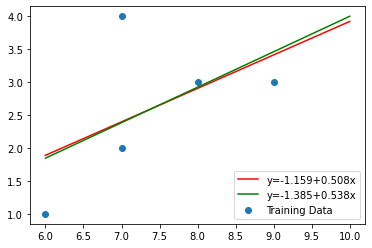

In [11]:
X = np.array([[6], [7], [8], [9], [7]])
y = np.array([1, 2, 3, 3, 4])

print('FOR THE GRADIENT-BASED ORDINARY LEAST SQUARES CODE \n')

# instantiate an OLS (gradient) object, fit to data, predict data
model = OrdinaryLeastSquaresGradient()
model.fit(X, y, [0, 0], alpha = 0.001, h = 0.001, tolerance = 0.01, maxIterations = 100000)
predictions = model.predict(X)

# print the predictions
print('\nThe predicted y values are', predictions.T[0])

# print the real y values
print('The real y values are', y)

# print the beta values
parameters = model.beta
print('The beta values are', parameters)

# plot the training points
plt.scatter(X, y, label = 'Training Data')

# plot the fitted model with the training data
xModel = np.linspace(6,10,100)
yModel = parameters[0] + parameters[1]*xModel
lineFormula = 'y={:.3f}+{:.3f}x'.format(parameters[0], parameters[1])
plt.plot(xModel, yModel, 'r', label = lineFormula)

# add a legend
plt.legend()

# return quality metrics
print('The r^2 score is', r2_score(y, predictions))
print('The mean squared error is', mean_squared_error(y, predictions))
print('The mean absolute error is', mean_absolute_error(y, predictions),'\n')

###################################################################################

print('FOR THE EXACT ORDINARY LEAST SQUARES CODE \n')

# instantiate an OLS (exact) object, fit to data, predict data
model = OrdinaryLeastSquaresExact()
model.fit(X,y)
predictions = model.predict(X)

# print the predictions
print('The predicted y values are', predictions.T[0])

# print the real y values
print('The real y values are', y)

# print the beta values
parameters = model.beta
print('The beta values are', parameters)

# plot the fitted model with the training data
xModel = np.linspace(6,10,100)
yModel = parameters[0] + parameters[1]*xModel
lineFormula = 'y={:.3f}+{:.3f}x'.format(parameters[0], parameters[1])
plt.plot(xModel, yModel, 'g', label = lineFormula)

# add a legend
plt.legend()

# return quality metrics
print('The r^2 score is', r2_score(y, predictions))
print('The mean squared error is', mean_squared_error(y, predictions))
print('The mean absolute error is', mean_absolute_error(y, predictions))

## 2D Example (Revisited)

In [12]:
trainX = np.array([[2, 2], [2, 3], [5, 6], [6, 7], [9, 10]])
trainY = np.array([3, 13, 19, 29, 35])

testX = np.array([[2, 1], [4, 5], [6, 5], [8, 9]])
testY = np.array([9, 15, 25, 31])

print('FOR THE GRADIENT-BASED ORDINARY LEAST SQUARES CODE \n')

# instantiate an OLS model
model = OrdinaryLeastSquaresGradient()

# fit the model to the training data (find the beta parameters)
model.fit(trainX, trainY, [0, 0, 0], alpha = 0.001, h = 0.001, tolerance = 0.01, maxIterations = 100000)

# return the predicted outputs for the datapoints in the training set
trainPredictions = model.predict(trainX)

# print the coefficient of determination r^2
print('\nThe r^2 score is', r2_score(trainY, trainPredictions))

# print quality metrics
print('The mean squared error on the training set is', mean_squared_error(trainY, trainPredictions))

# return the predicted outputs for the datapoints in the test set
predictions = model.predict(testX)

# print the predictions
print('The predicted y values for the test set are', predictions.T[0])

# print the real y values
print('The real y values for the test set are', testY)

# print the beta values
betaApprox = model.beta
print('The beta values are', betaApprox)

# print quality metrics
print('The mean squared error on the test set is', mean_squared_error(testY, predictions), '\n')

##############################################################################################

print('FOR THE EXACT ORDINARY LEAST SQUARES CODE \n')

# instantiate an OLS model
model = OrdinaryLeastSquaresExact()

# fit the model to the training data (find the beta parameters)
model.fit(trainX, trainY)

# return the predicted outputs for the datapoints in the training set
trainPredictions = model.predict(trainX)

# print the coefficient of determination r^2
print('The r^2 score is', r2_score(trainY, trainPredictions))

# print quality metrics
print('The mean squared error on the training set is', mean_squared_error(trainY, trainPredictions))

# return the predicted outputs for the datapoints in the test set
predictions = model.predict(testX)

# print the predictions
print('The predicted y values for the test set are', predictions.T[0])

# print the real y values
print('The real y values for the test set are', testY)

# print the beta values
betaExact = model.beta
print('The beta values are', betaExact)

# print quality metrics
print('The mean squared error on the test set is', mean_squared_error(testY, predictions))

FOR THE GRADIENT-BASED ORDINARY LEAST SQUARES CODE 

Gradient descent took 12984 iterations to converge
The norm of the gradient is 0.009998702083919297

The r^2 score is 0.9642661609185357
The mean squared error on the training set is 4.608235887945642
The predicted y values for the test set are [-6.44748058 19.07004759  6.67858093 32.19610911]
The real y values for the test set are [ 9 15 25 31]
The beta values are [-3.53326263 -6.19573333  9.47724871]
The mean squared error on the test set is 148.07375435455714 

FOR THE EXACT ORDINARY LEAST SQUARES CODE 

The r^2 score is 0.9642679900744415
The mean squared error on the training set is 4.608000000000017
The predicted y values for the test set are [-6.52 19.08  6.6  32.2 ]
The real y values for the test set are [ 9 15 25 31]
The beta values are [-3.56 -6.24  9.52]
The mean squared error on the test set is 149.3792000000069


## Example: High School Graduate Rates in the US (Revisited)

In [13]:
# import the data from the csv file to an numpy array
data = pandas.read_csv('data/US_State_Data.csv', sep=',').to_numpy()
#print(data)
X = np.array(data[:,1:7], dtype=float)
y = np.array(data[:,8], dtype=float)

# split the data into training and test sets
(trainX, testX, trainY, testY) = train_test_split(X, y, test_size = 0.25, random_state = 1)

trainX = scale(trainX)
testX = scale(testX)

print('FOR THE GRADIENT-BASED ORDINARY LEAST SQUARES CODE \n')

# instantiate an OLS model
model = OrdinaryLeastSquaresGradient()

# fit the model to the training data (find the beta parameters)
model.fit(trainX, trainY, [0, 0, 0, 0, 0, 0, 0], alpha = 0.001, h = 0.001, tolerance = 0.01, maxIterations = 100000)

# return the predicted outputs for the datapoints in the training set
trainPredictions = model.predict(trainX)

# print the coefficient of determination r^2
print('\nThe r^2 score is', r2_score(trainY, trainPredictions))

# print quality metrics
print('The mean absolute error on the training set is', mean_absolute_error(trainY, trainPredictions))

# return the predicted outputs for the datapoints in the test set
predictions = model.predict(testX)

# print the predictions
print('The predicted y values for the test set are', np.round(predictions.T[0],0))

# print the real y values
print('The real y values for the test set are     ', testY)

# print the beta values
print('The beta values are', model.beta)

# print quality metrics
print('The mean absolute error on the test set is', mean_absolute_error(testY, predictions), '\n')

##################################################################

print('FOR THE EXACT ORDINARY LEAST SQUARES CODE \n')

# instantiate an OLS model
model = OrdinaryLeastSquaresExact()

# fit the model to the training data (find the beta parameters)
model.fit(trainX, trainY)

# return the predicted outputs for the datapoints in the training set
trainPredictions = model.predict(trainX)

# print the coefficient of determination r^2
print('The r^2 score is', r2_score(trainY, trainPredictions))

# print quality metrics
print('The mean absolute error on the training set is', mean_absolute_error(trainY, trainPredictions))

# return the predicted outputs for the datapoints in the test set
predictions = model.predict(testX)

# print the predictions
print('The predicted y values for the test set are', np.round(predictions.T[0],0))

# print the real y values
print('The real y values for the test set are     ', testY)

# print the beta values
print('The beta values are', model.beta)

# print quality metrics
print('The mean absolute error on the test set is', mean_absolute_error(testY, predictions))

FOR THE GRADIENT-BASED ORDINARY LEAST SQUARES CODE 

Gradient descent took 786 iterations to converge
The norm of the gradient is 0.009904894592102644

The r^2 score is 0.39216258491472866
The mean absolute error on the training set is 3.7965640305341184
The predicted y values for the test set are [81. 80. 89. 86. 81. 82. 85. 90. 76. 84. 84. 80. 83.]
The real y values for the test set are      [70. 83. 83. 81. 76. 87. 89. 89. 78. 78. 84. 80. 79.]
The beta values are [82.97247297 -3.79844358  0.52284534 -1.27291957 -1.296429   -1.71354363  2.21637078]
The mean absolute error on the test set is 4.050315901439818 

FOR THE EXACT ORDINARY LEAST SQUARES CODE 

The r^2 score is 0.3921626378110832
The mean absolute error on the training set is 3.7964561049855736
The predicted y values for the test set are [81. 80. 89. 86. 81. 82. 85. 90. 76. 84. 84. 80. 83.]
The real y values for the test set are      [70. 83. 83. 81. 76. 87. 89. 89. 78. 78. 84. 80. 79.]
The beta values are [82.97297297 -3.79

## Comments on Gradient Descent

* We get almost identical results in all of these examples in using a gradient-based method for ordinary least squares.

* It runs a little slower, but not much.

* We must be careful with the $h$ and tolerance hyperparameters to be sure gradient descent will converge.

* Gradient descent in our implementation above does not actually require any derivatives since we only used approximate derivatives.

* If we knew formulas for the derivatives, we could compute them exactly to let the step size be exactly proportional to $\nabla L$. This would drastically reduce the number of times we compute the loss function.

* Gradient descent and related methods are the main driver of many machine learning problems that are based on to minimizing a loss function (least squares and neural networks, among others), although we will later need some variants to reduce the computational burden.

## Linear Dependence: When Ordinary Least Squares Fails

Recall the global minimum of the ordinary least squares loss function we found previously, $\beta=(X^T X)^{-1}X^T y$, relied on the assumption that the columns of $X$ are **linearly independent**, which means no column is a linear combination of any set of other columns--i.e. that we do not have

$$c_1(\text{column }n_1) + \cdots + c_k(\text{column }n_k)=0$$

for any nonzero constants $c_1, ..., c_k$ or any subset of the columns of $X$.

This may seem to be an unlikely scenario since we deal with some large datasets, but it turns out, this is a more frequent occurrence than one might think.

* In the high school graduation data above, we had violent crime rates and property crime rates. If we had the overall crime rate as well, ordinary least squares would have failed because we classify all crime as violent crime or property crime:

$$(\text{crime}) = (\text{violent crime}) + (\text{property crime})$$

    Therefore, the columns of $X$ are not linearly independent.

* Suppose we have demographic data from several small countries including an age distribution giving us the number of people in the population of ages 0-17, 18-35, 36-65, and 66+, and also the population of the country.

    | Country | Age 0-17 | Age 18-35 | Age 36-65 | Age 66+ | Population|
    |:----------|:------|:------|:------|:------|:------|
    | Country 1 | 20000 | 30000 | 30000 | 20000 | 100000 | 
    | Country 2 | 50000 | 70000 | 60000 | 20000 | 200000 |
    | Country 2 | 30000 | 30000 | 50000 | 10000 | 120000 |

    Then, we have columns that are not independent since
    
$$(\text{Age 0-17}) + (\text{Age 18-35}) + (\text{Age 36-65}) + (\text{Age 65+}) = (\text{Population}).$$

* If we have a dataset of houses and their characteristics, it is common practice for realtors to categorize bathrooms as half bathrooms (bathrooms with no showers/bath tubs) or full bathrooms and then also report the total number of bathrooms. Here, again, we naturally get non-independent columns because

$$\text{bathrooms} = \frac{1}{2}(\text{half bathrooms}) + (\text{full bathrooms}).$$

From these examples, we see this phenomenon of linear dependence, sometimes called collinearity in regression analysis, naturally occurs in datasets all over the place. When this happens, again, we cannot find the minimum of the ordinary least squares loss function, so we cannot use the method in a rather common scenario. As you might suspect, this sort of pattern tends to be even more likely for high-dimensional data.

## Regularization

**Regularization** is an approach of adjusting a model in various ways to deal with collinearity among other problems. Another important effect of regularization is that it can sometimes reduce over-fitting, a problem where we fit the model to the training data too strongly causing it to perform badly on test data.

For example, in the image below, a regularized model would look more like the green curve, which is much simpler and *probably* captures the real dynamics of the system generating the data better than the blue curve, even though they both fit the training data (the red dots) perfectly.

<img src="images/regularization.png" width="400" />

In general, regularization typically sacrifices some training accuracy through approaches that reduce the dimension of the parameter space, shrink some parameters, and adjust loss functions in such a way that it improves how well the model generalizes to test data and other unknown data.

We will want to add regularization to our toolbox of machine learning as it is a common technique, especially whenever we turn our learning problem into a loss function minimization problem, which is what neural networks will do. There are a few common regularization methods use in linear regression, which mirror its usage in neural networks, that we will discuss below.

## Ridge Regression

**Ridge regression** (also called **Tikhonov regularization** or $L^2$ **regularization**) offers a partial remedy for the problems of linear dependence and overfitting by adjusting the loss function so we can solve it in such a way that we, in effect, reduce the dimension of the space.

Now, we could reduce the dimension by setting $\beta_i=0$ for certain variables manually, but we generally do not know which variables are important, so selecting these is not easy and generally requires some iterative procedure, which would be computationally expensive if the dimension is high. Further, removing variables entirely does not allow us to see what effect they have (even if the effect is small).

Instead, we would like to "encourage" the $\beta_i$'s to be small in a continuous sort of way by **penalizing** large $\beta_i$'s. To do this, instead of the ordinary least squares loss function

$$L(\beta)=\sum\limits_{i=1}^n \left(f(x_i)-y_i\right)^2= \|X\beta-y\|_2^2,$$

we add another term to the loss function to get

$$L_{\text{ridge}}(\lambda,\beta)=\sum\limits_{i=1}^n \left(f(x_i)-y_i\right)^2 + \lambda\sum\limits_{i=1}^d\beta_i^2=\|X\beta-y\|_2^2+\lambda\|\beta\|_2^2,$$

for some constant $\lambda\geq 0$. So, here, if $\beta_i$ is large, the loss will be larger. Therefore, when we minimize the loss function, it will push $\beta_i$'s toward 0 unless there is a really good reason not to do so. That's why we say we *penalize* large $\beta$ values.

The value $\lambda$ is a hyperparameter of ridge regression. As $\lambda\to 0$, ridge regression approaches ordinary least squares. If $\lambda$ is very large, optimizing the loss function will force the $\beta$ values to be small. So, the larger we make $\lambda$, the more pressure we put on the $\beta$ parameters to shrink.

### Note

For ridge regression, you typically should normalize the data before minimizing the loss function. Otherwise, different scaling will cause minimization to penalize some variables more than others.

## LASSO Regression and Elastic Net Regression

**LASSO** (least absolute shrinkage and selection operator) regression is very similar to ridge regression, but it can otherwise be called $L^1$ regularization because it adds an $L^1$ penalty to the size of the $\beta$ parameters, so the loss function is

$$L_{\text{lasso}}(\lambda,\beta)=\sum\limits_{i=1}^n \left(f(x_i)-y_i\right)^2 + \lambda\sum\limits_{i=1}^d |\beta_i|=\|X\beta-y\|_2^2+\lambda\|\beta\|_1.$$

**Elastic net** regression combines both $L^1$ and $L^2$ regularization as a linear combination. So, the elastic net loss function is

$$L_{\text{elastic}}(\lambda_1,\lambda_2,\beta)=\sum\limits_{i=1}^n \left(f(x_i)-y_i\right)^2 + \lambda_1\sum\limits_{i=1}^d |\beta_i| \lambda_2\sum\limits_{i=1}^d \beta_i^2=\|X\beta-y\|_2^2+\lambda_1\|\beta\|_1+\lambda_2\|\beta\|_2^2,$$

so it contains two hyperparameters $\lambda_1\geq 0$ and $\lambda_2\geq 0$ controlling how large the $L^1$ and $L^2$ penalties are.

## Ridge vs. Lasso vs. Elastic Net Regression

Ridge, lasso, and elastic net regression aim to accomplish most of the same tasks:

1. Predict outputs when there are linearly dependent variables
2. Reduce the dimension of the data (practically speaking)
3. improve how well a model can generalize to test data and beyond

So, which one should we use? That's not really an easy question to answer because the usefulness of a model depends on how well it can generalize to unknown datapoints, but they are unknown, so... we don't know much about them!

There are some differences between $L^1$ and $L^2$ penalties that can guide our testing, although only testing is likely to tell us what will work better, practically speaking.

* A loss function with an $L^1$ penalty is NOT differentiable when any $\beta_i=0$, so we have to be careful with gradient-based methods. A method called soft-thresholding is often used to send parameters directly to 0 if the gradient method brings a $\beta_i$ sufficiently close close to 0.

* A loss function with an $L^2$ penalty will not cause parameters to go to 0, but $L^1$ can. (We will talk about some of the geometry of why this is true in class. It's also discussed in some videos about <a href="https://www.youtube.com/watch?v=5asL5Eq2x0A">ridge</a> and <a href="https://www.youtube.com/watch?v=jbwSCwoT51M">lasso</a> regression.)

* There is no simple formula for $\beta$ minimizing the loss functions in lasso or elastic net regression, so numerical optimization, such as gradient descent, must be used.

* There is a matrix expression for $\beta$ minimizing the loss function in ridge regression (see Homework 2), but gradient descent can be used as well.

This means $L^1$ can totally eliminate variables, which can be good or bad depending on what we are modeling. If the output is well-predicted by only a few variables, this is good. If we need lots of variables to predict the output, this is bad.

These notes only provide a short intro to regularization techniques, but you can read more from the (free) classic book <a href="https://web.stanford.edu/~hastie/ElemStatLearn/">*Elements of Statistical Learning*</a> by Hastie, et. al., in section 3.4.